### **Load data**

The anemia dataset from kaggle: https://www.kaggle.com/datasets/humairmunir/anaemia-prediction-dataset/data

Please first download the data, unzip it to csv, and then upload to google colab via the left panel.

In [ ]:
import pandas as pd

def load_data(file_path=None, drive_path=None):
    if file_path:
        df = pd.read_csv(file_path)
    elif drive_path:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(drive_path)
    else:
        raise ValueError("Either file_path or drive_path must be provided.")
    return df

# Load and preprocess data once
file_path = '/content/sample_data/d_output.csv'

# drive_path = '/content/drive/My Drive/CS M148/Python Notebooks/Datasets/Aenemia Data/d_output.csv'
#df = load_data(file_path=file_path)

# Read the CSV file
df = pd.read_csv(file_path)

# display the first 20 rows of data.
df.head(20)

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
5,6,F,42.650694,30.102835,27.364009,9.900000,Yes
6,7,F,44.073986,29.946709,25.992890,8.344133,Yes
7,8,F,41.034469,31.856075,27.238625,9.764485,Yes
8,9,M,45.800995,30.085051,24.230831,9.105038,Yes
9,10,M,40.581274,32.043280,27.256172,4.091686,Yes


Alternatively, you can load the data from your google drive

In [ ]:
'''

# Load the data from google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/CS M148/Python Notebooks/Datasets/Aenemia Data/d_output.csv') # adjust path accordingly
df.head(20)

'''

"\n\n# Load the data from google drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\nimport pandas as pd\ndf = pd.read_csv('/content/drive/My Drive/CS M148/Python Notebooks/Datasets/Aenemia Data/d_output.csv') # adjust path accordingly\ndf.head(20)\n\n"

### **Data Preprocessing and Visualization**



In [ ]:
# information of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [ ]:
#describe data:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,45.030260,29.392138,25.576149,10.938374
std,144.481833,2.777042,1.585042,1.917043,2.767554
min,1.000000,38.626133,25.023080,19.495306,4.000000
25%,125.750000,43.199936,28.311988,24.877544,9.061067
50%,250.500000,44.906648,29.534431,25.982361,10.018786
75%,375.250000,46.357891,30.582852,26.754657,13.092756
max,500.000000,54.776064,32.526455,29.956341,16.508313


In [ ]:
# Check for Null data:
df.isnull().sum()

,0
Number,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Hb,0
Anaemic,0


In [ ]:
# check the balance of the target:
df['Anaemic'].value_counts()

,count
Anaemic,
Yes,250
No,250


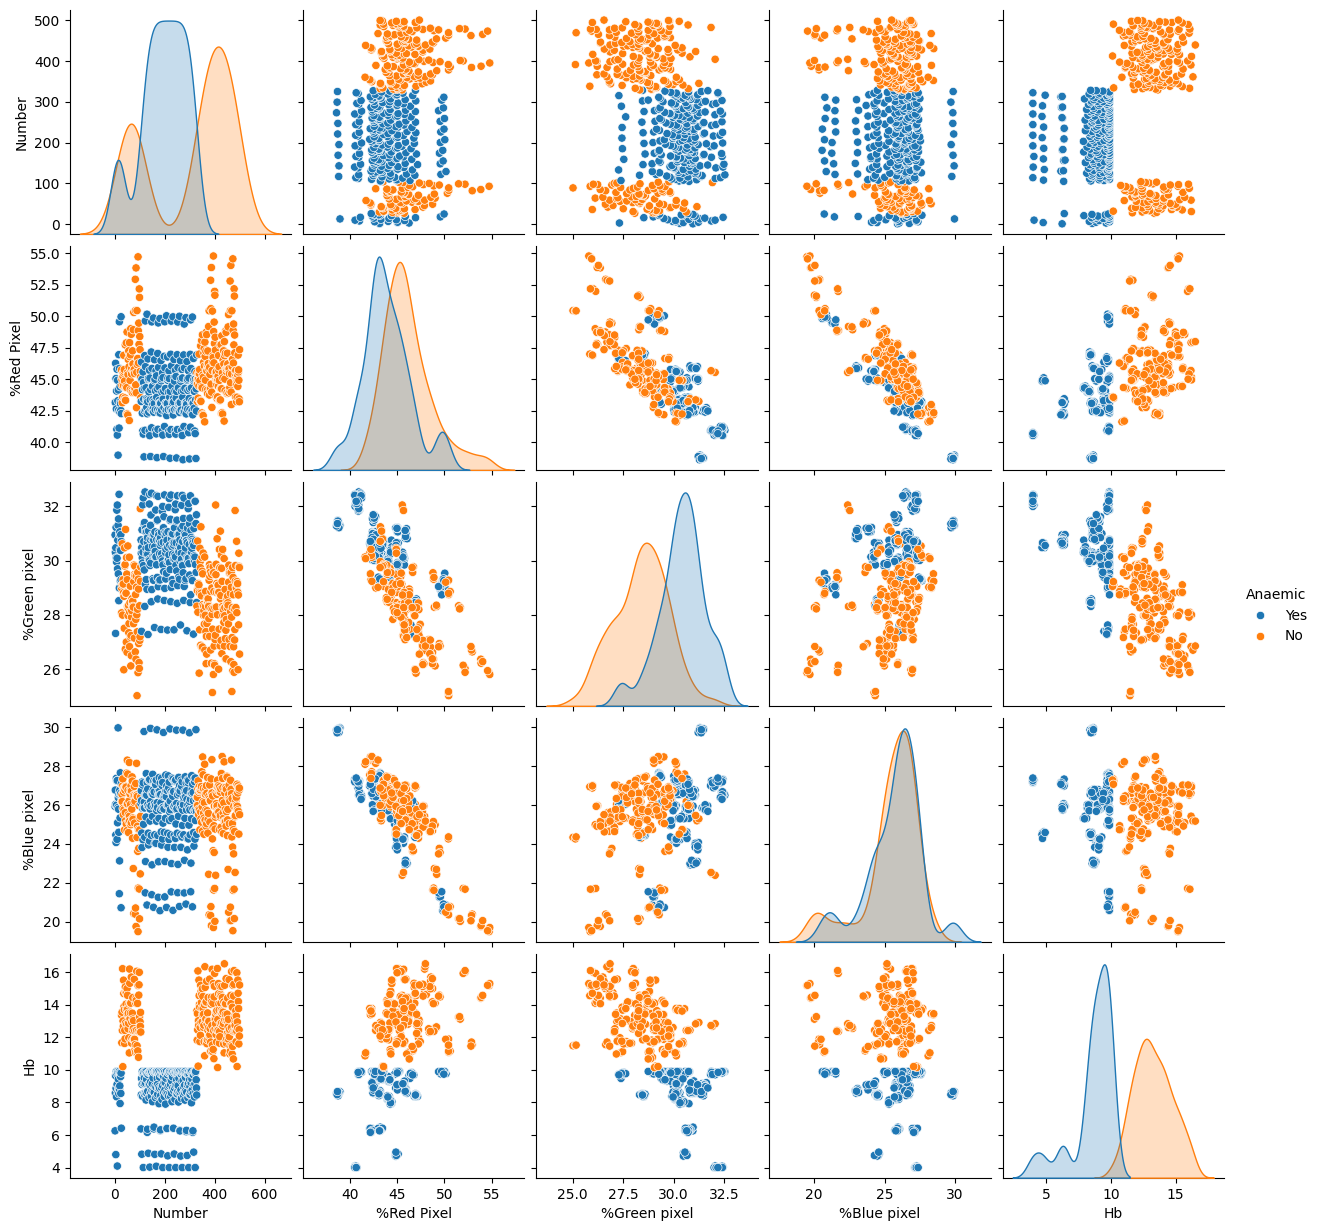

In [ ]:
from seaborn import pairplot
import matplotlib.pyplot as plt

pairplot(df, hue='Anaemic')
plt.show()

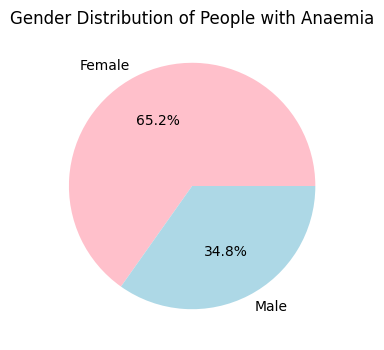

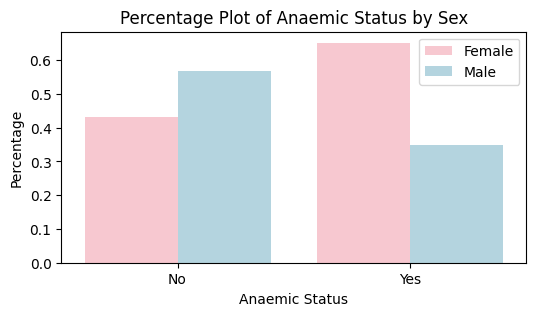

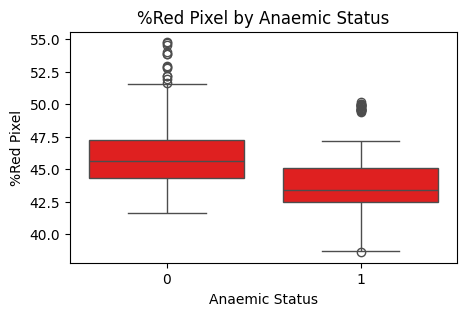

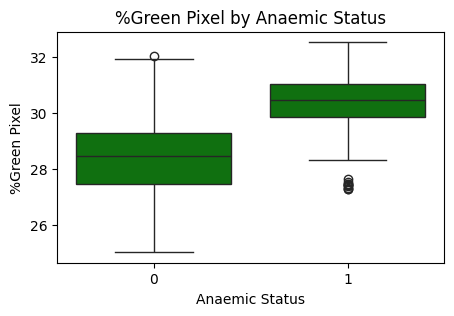

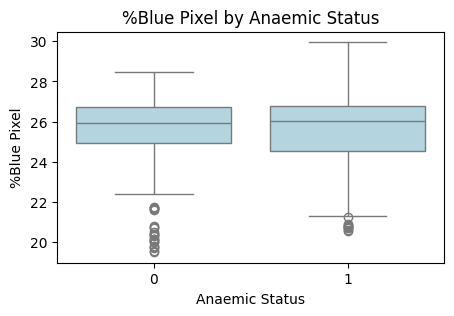

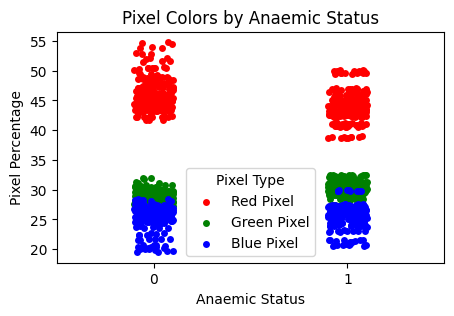

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if df['Sex'].dtype == object:
    df['Sex'] = df['Sex'].str.strip().map({'M': 'M', 'F': 'F'})  # Keep original categorical values for plotting

if df['Anaemic'].dtype == object and df['Anaemic'].str.contains('Yes|No').any():
    df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})  # 1 for Yes and 0 for No

# Convert 'Anaemic' back to categorical for plotting
if df['Anaemic'].dtype != object:
    df['Anaemic'] = df['Anaemic'].map({1: 'Y', 0: 'N'})

# Encode categorical features, handling potential spaces
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0, 'M ': 1, 'F ': 0, 1: 1, 0: 0})  # 1 for Male and 0 for Female
df['Anaemic'] = df['Anaemic'].map({'Y': 1, 'N': 0})  # 1 for Yes and 0 for No

# Pie chart for gender distribution among anaemic people
anaemic_df = df[df['Anaemic'] == 1]
gender_counts = anaemic_df['Sex'].value_counts()

# Ensure correct labels based on the actual counts
labels = ['Female' if sex == 0 else 'Male' for sex in gender_counts.index]

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Gender Distribution of People with Anaemia')
plt.show()


# Function to calculate percentages for count plots
def calculate_percentages(data, column, hue=None):
    if hue:
        counts = data.groupby([column, hue]).size().unstack(fill_value=0)
        percentages = counts.div(counts.sum(axis=1), axis=0)
        return percentages.stack().reset_index(name='Percentage')
    else:
        counts = data[column].value_counts()
        percentages = counts / counts.sum()
        return percentages.reset_index(name='Percentage')

# Plot Sex vs. Anaemic with percentages
plt.figure(figsize=(6, 3))
percentages = calculate_percentages(df, 'Anaemic', hue='Sex')
ax = sns.barplot(x='Anaemic', y='Percentage', hue='Sex', data=percentages, palette=['pink', 'lightblue']) # Assign the plot to a variable
plt.title('Percentage Plot of Anaemic Status by Sex')
plt.xlabel('Anaemic Status')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Female', 'Male']
ax.legend(handles=handles, labels=new_labels)

plt.show()

# Box plots with customized colors
plt.figure(figsize=(5, 3))
sns.boxplot(x='Anaemic', y='%Red Pixel', hue='Anaemic', data=df, palette=['red', 'red'], legend=False)
plt.title('%Red Pixel by Anaemic Status')
plt.xlabel('Anaemic Status')
plt.ylabel('%Red Pixel')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='Anaemic', y='%Green pixel', hue='Anaemic', data=df, palette=['green', 'green'], legend=False)
plt.title('%Green Pixel by Anaemic Status')
plt.xlabel('Anaemic Status')
plt.ylabel('%Green Pixel')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='Anaemic', y='%Blue pixel', hue='Anaemic', data=df, palette=['lightblue', 'lightblue'], legend=False)
plt.title('%Blue Pixel by Anaemic Status')
plt.xlabel('Anaemic Status')
plt.ylabel('%Blue Pixel')
plt.show()


# Combine %Red Pixel, %Green Pixel, and %Blue Pixel into one plot against Anaemic
plt.figure(figsize=(5, 3))
sns.stripplot(x='Anaemic', y='%Red Pixel', data=df, jitter=True, color='red', label='Red Pixel')
sns.stripplot(x='Anaemic', y='%Green pixel', data=df, jitter=True, color='green', label='Green Pixel')
sns.stripplot(x='Anaemic', y='%Blue pixel', data=df, jitter=True, color='blue', label='Blue Pixel')
plt.title('Pixel Colors by Anaemic Status')
plt.xlabel('Anaemic Status')
plt.ylabel('Pixel Percentage')

# Get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Select labels at indices 1, 3, and 5
indices = [1, 3, 5]
selected_handles = [handles[i] for i in indices]
selected_labels = [labels[i] for i in indices]

# Update legend with selected labels
plt.legend(handles=selected_handles, labels=selected_labels, title='Pixel Type')

plt.show()


### **Split Data into Train/Test**

We use a 80-20 split for train--test

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
df = df.drop(columns=['Number', 'Hb'], errors='ignore')

# Prepare features and target
X = df[['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel']]
y = df['Anaemic']

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Convert imputed array back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Convert scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_imputed_df.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### **Logistic Regression**

Use sklearn.linear_model to create LogisticRegression model

     C  accuracy  precision   recall  f1_score  roc_auc  FP_rate  FN_rate
  0.01      0.70   0.563636 0.837838  0.673913 0.850279 0.380952 0.162162
  0.10      0.73   0.586207 0.918919  0.715789 0.886315 0.380952 0.081081
  1.00      0.75   0.607143 0.918919  0.731183 0.891034 0.349206 0.081081
 10.00      0.76   0.618182 0.918919  0.739130 0.887602 0.333333 0.081081
100.00      0.75   0.607143 0.918919  0.731183 0.881596 0.349206 0.081081
Best C based on accuracy: 10.0


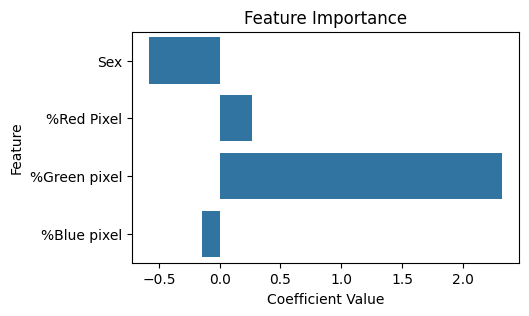

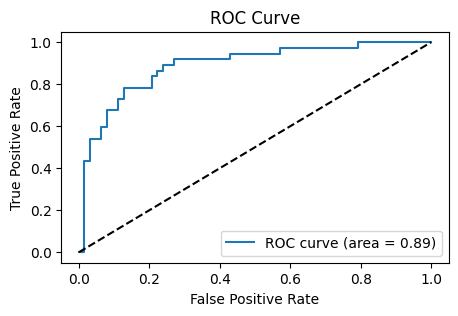

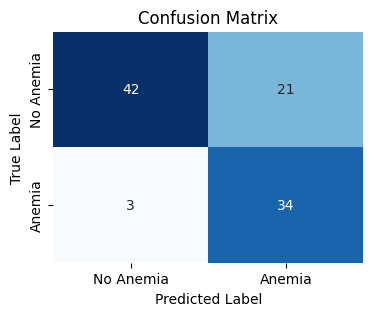

Best Model (C=10.0) Metrics:
Accuracy: 0.7600
Precision: 0.6182
Recall: 0.9189
F1 Score: 0.7391
ROC AUC: 0.8876
False Positive Rate: 0.3333
False Negative Rate: 0.0811



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

# List of regularization coefficients
C_values = [0.01, 0.1, 1, 10, 100]
results = []

# Function to calculate and print model metrics
def print_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    return accuracy, precision, recall, f1, roc_auc, false_positive_rate, false_negative_rate, cm

# Train Logistic Regression models with different regularization coefficients
for C in C_values:
    model = LogisticRegression(C=C, random_state=42, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics = print_metrics(y_test, y_pred, y_prob)
    results.append({'C': C, 'accuracy': metrics[0], 'precision': metrics[1], 'recall': metrics[2], 'f1_score': metrics[3], 'roc_auc': metrics[4], 'FP_rate': metrics[5], 'FN_rate': metrics[6]})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print the results
pd.set_option('display.max_colwidth', None)
print(results_df.to_string(index=False))

# Determine the best model based on accuracy
best_C = results_df.loc[results_df['accuracy'].idxmax(), 'C']
print(f'Best C based on accuracy: {best_C}')

# Plot feature importance (coefficients) for the best model
best_model = LogisticRegression(C=best_C, random_state=42, solver='liblinear')
best_model.fit(X_train, y_train)
feature_importance = best_model.coef_[0]
features = X.columns

plt.figure(figsize=(5, 3))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Evaluate and plot ROC curve for the best model
y_best_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_best_prob)

plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_best_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Confusion Matrix for the best model
best_y_pred = best_model.predict(X_test)
best_cm = confusion_matrix(y_test, best_y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Anemia', 'Anemia'], yticklabels=['No Anemia', 'Anemia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the best model's metrics
best_metrics = print_metrics(y_test, best_y_pred, y_best_prob)
print(f'Best Model (C={best_C}) Metrics:\nAccuracy: {best_metrics[0]:.4f}\nPrecision: {best_metrics[1]:.4f}\nRecall: {best_metrics[2]:.4f}\nF1 Score: {best_metrics[3]:.4f}\nROC AUC: {best_metrics[4]:.4f}\nFalse Positive Rate: {best_metrics[5]:.4f}\nFalse Negative Rate: {best_metrics[6]:.4f}\n')


### **Linear SVM**

### **Linear and Non-Linear SVM**

**Searching for best kernel function and best C-value**

We test C values of 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000.

We also test linear, polynomial, radial basis function, and sigmoid kernels.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

# K-fold cross validation set up
kf = KFold(n_splits=10, shuffle=True, random_state=42)

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

kernelAccuracies = [['linear', [], []], ['poly', [], []], ['rbf', [], []], ['sigmoid', [], []]]

bestLinearAccuracy = 0
bestLinearModel = []

bestNonLinearAccuracy = 0
bestNonLinearModel = []

for i in range(4):
  for C in Cs:
    temp_accuracies = []
    temp_r2s = []
    for train_index, test_index in kf.split(X_scaled_df):
      # split the data
      X_train_CV, X_test_CV = X_scaled_df.iloc[train_index], X_scaled_df.iloc[test_index]
      y_train_CV, y_test_CV = y.iloc[train_index], y.iloc[test_index]

      # Create and train the SVM model
      svm = SVC(kernel=kernels[i], C=C, random_state=42, probability=True)
      svm.fit(X_train_CV, y_train_CV)

      # Make predictions on the test set
      y_pred = svm.predict(X_test_CV)

      # Evaluate the model
      temp_accuracies.append(accuracy_score(y_test_CV, y_pred))
      temp_r2s.append(r2_score(y_test_CV, y_pred))

    temp_accuracy = np.mean(temp_accuracies)
    temp_r2 = np.mean(temp_r2s)
    kernelAccuracies[i][1].append(temp_accuracy)
    print(f"Kernel:{kernels[i]}, C:{C}, Training Accuracy: {temp_accuracy:.3f}")
    if i == 0:
      if bestLinearAccuracy < temp_accuracy:
        bestLinearModel = [kernels[i], C, temp_r2, svm]
        bestLinearAccuracy = temp_accuracy
    else:
      if bestNonLinearAccuracy < temp_accuracy:
        bestNonLinearModel = [kernels[i], C, temp_r2, svm]
        bestNonLinearAccuracy = temp_accuracy

Kernel:linear, C:0.001, Training Accuracy: 0.694
Kernel:linear, C:0.01, Training Accuracy: 0.794
Kernel:linear, C:0.1, Training Accuracy: 0.788
Kernel:linear, C:1, Training Accuracy: 0.796
Kernel:linear, C:10, Training Accuracy: 0.794
Kernel:linear, C:100, Training Accuracy: 0.794
Kernel:linear, C:1000, Training Accuracy: 0.794
Kernel:linear, C:10000, Training Accuracy: 0.794
Kernel:poly, C:0.001, Training Accuracy: 0.514
Kernel:poly, C:0.01, Training Accuracy: 0.702
Kernel:poly, C:0.1, Training Accuracy: 0.844
Kernel:poly, C:1, Training Accuracy: 0.830
Kernel:poly, C:10, Training Accuracy: 0.852
Kernel:poly, C:100, Training Accuracy: 0.860
Kernel:poly, C:1000, Training Accuracy: 0.860
Kernel:poly, C:10000, Training Accuracy: 0.854
Kernel:rbf, C:0.001, Training Accuracy: 0.472
Kernel:rbf, C:0.01, Training Accuracy: 0.568
Kernel:rbf, C:0.1, Training Accuracy: 0.812
Kernel:rbf, C:1, Training Accuracy: 0.840
Kernel:rbf, C:10, Training Accuracy: 0.876
Kernel:rbf, C:100, Training Accuracy: 

Best Model: ['rbf', 10000, 0.7088052736786753, SVC(C=10000, probability=True, random_state=42)]


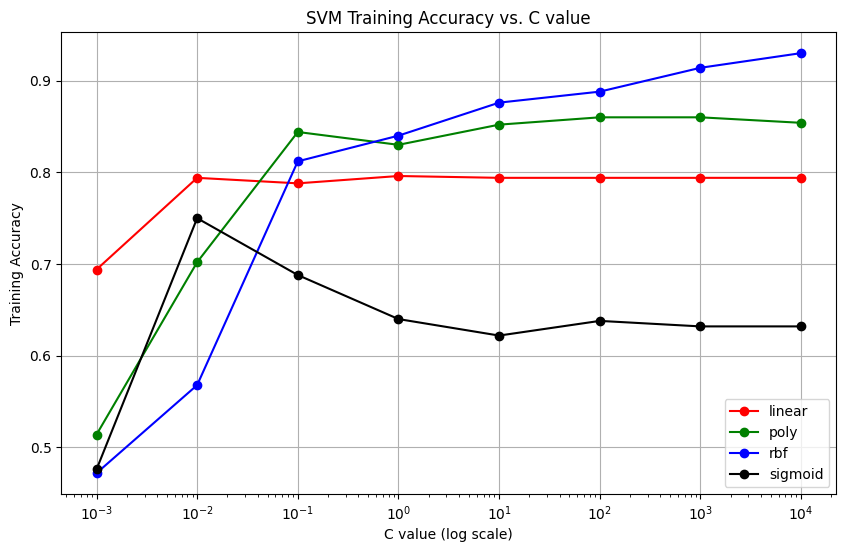

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.semilogx(Cs, kernelAccuracies[0][1], marker='o', color='red')
plt.semilogx(Cs, kernelAccuracies[1][1], marker='o', color='green')
plt.semilogx(Cs, kernelAccuracies[2][1], marker='o', color='blue')
plt.semilogx(Cs, kernelAccuracies[3][1], marker='o', color='black')
plt.legend(['linear', 'poly', 'rbf', 'sigmoid'], loc="lower right")
plt.title('SVM Training Accuracy vs. C value')
plt.xlabel('C value (log scale)')
plt.ylabel('Training Accuracy')
plt.grid(True)

print(f"Best Model: {bestNonLinearModel}")

Train the best linear and non-linear models on the entire training subset

In [ ]:
# Train the best linear and non-linear models on the entire training subset

linear_svm = SVC(kernel=bestLinearModel[0], C=bestLinearModel[1], random_state=42, probability=True)
linear_svm.fit(X_train, y_train)

best_non_linear_svm = SVC(kernel=bestNonLinearModel[0], C=bestNonLinearModel[1], random_state=42, probability=True)
best_non_linear_svm.fit(X_train, y_train)

print(f"Best Linear Model:")
print(f"C:{bestLinearModel[1]}")
print()
print(f"Best Non Linear Model:")
print(f"Kernel: {bestNonLinearModel[0]}, C: {bestNonLinearModel[1]}")


Best Linear Model:
C:1

Best Non Linear Model:
Kernel: rbf, C: 10000


Linear SVM Metrics

Accuracy: 0.75

Precision: 0.6071428571428571
Recall: 0.918918918918919
F1-score 0.7311827956989247
ROC AUC: 0.9000429000429001
False Positive Rate: 0.3492063492063492
False Negative Rate: 0.08108108108108109

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.77        63
           1       0.61      0.92      0.73        37

    accuracy                           0.75       100
   macro avg       0.77      0.78      0.75       100
weighted avg       0.81      0.75      0.75       100

Confusion Matrix:
 [[41 22]
 [ 3 34]]


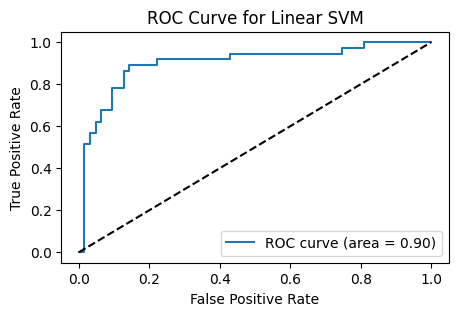

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

# Function to calculate and print model metrics
def print_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    return accuracy, precision, recall, f1, roc_auc, false_positive_rate, false_negative_rate, cm

# Predict on the test set, calculate the probability, and print model metrics
y_pred_linear_svm = linear_svm.predict(X_test)
y_prob_linear_svm = linear_svm.predict_proba(X_test)[:, 1]
linear_svm_metrics = print_metrics(y_test, y_pred_linear_svm, y_prob_linear_svm)

print("Linear SVM Metrics")
print()

# Evaluation
print("Accuracy:", linear_svm_metrics[0])
print()
print("Precision:", linear_svm_metrics[1])
print("Recall:", linear_svm_metrics[2])
print("F1-score", linear_svm_metrics[3])
print("ROC AUC:", linear_svm_metrics[4])
print("False Positive Rate:", linear_svm_metrics[5])
print("False Negative Rate:", linear_svm_metrics[6])
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear_svm))
print("Confusion Matrix:\n", linear_svm_metrics[7])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_linear_svm)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob_linear_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear SVM')
plt.legend(loc='best')
plt.show()

Non Linear SVM Metrics

Accuracy: 0.86

Precision: 0.7555555555555555
Recall: 0.918918918918919
F1-score 0.8292682926829269
ROC AUC: 0.9009009009009009
False Positive Rate: 0.1746031746031746
False Negative Rate: 0.08108108108108109

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.88        63
           1       0.76      0.92      0.83        37

    accuracy                           0.86       100
   macro avg       0.85      0.87      0.86       100
weighted avg       0.88      0.86      0.86       100

Confusion Matrix:
 [[52 11]
 [ 3 34]]


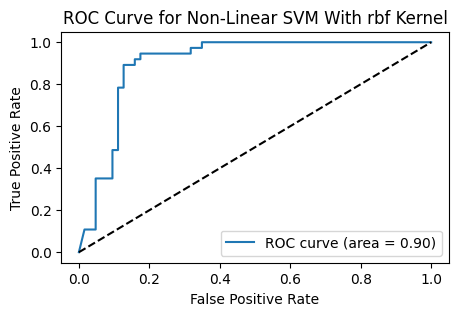

In [ ]:
# Function to calculate and print model metrics
def print_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    return accuracy, precision, recall, f1, roc_auc, false_positive_rate, false_negative_rate, cm

# Predict on the test set, calculate the probability, and print model metrics
y_pred_non_linear_svm = best_non_linear_svm.predict(X_test)
y_prob_non_linear_svm = best_non_linear_svm.predict_proba(X_test)[:, 1]
non_linear_svm_metrics = print_metrics(y_test, y_pred_non_linear_svm, y_prob_non_linear_svm)

print("Non Linear SVM Metrics")
print()

# Evaluation
print("Accuracy:", non_linear_svm_metrics[0])
print()
print("Precision:", non_linear_svm_metrics[1])
print("Recall:", non_linear_svm_metrics[2])
print("F1-score", non_linear_svm_metrics[3])
print("ROC AUC:", non_linear_svm_metrics[4])
print("False Positive Rate:", non_linear_svm_metrics[5])
print("False Negative Rate:", non_linear_svm_metrics[6])
print("\nClassification Report:\n", classification_report(y_test, y_pred_non_linear_svm))
print("Confusion Matrix:\n", non_linear_svm_metrics[7])

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_non_linear_svm)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob_non_linear_svm):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"ROC Curve for Non-Linear SVM With {bestNonLinearModel[0]} Kernel")
plt.legend(loc='best')
plt.show()

**Plotting Linear SVM Decision Boundary and Margins**

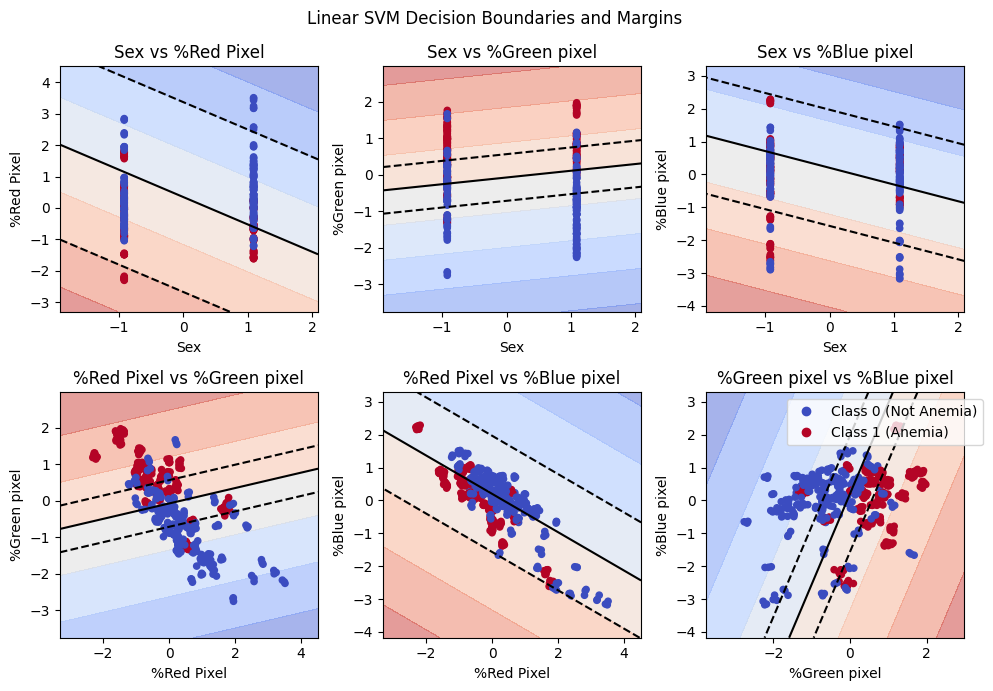

In [ ]:
feature_names = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel']
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a 2x3 grid of subplots
plt.figure(figsize=(10, 7))

for i, features in enumerate(feature_combinations):
    plt.subplot(2, 3, i+1)
    # Extract the two features we're plotting
    X_subset = X_scaled[:, features]

    # Create mesh grid
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create input for prediction
    X_pred = np.zeros((xx.ravel().shape[0], 4))
    X_pred[:, features[0]] = xx.ravel()
    X_pred[:, features[1]] = yy.ravel()

    # Predict
    Z = linear_svm.decision_function(X_pred)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Plot data points
    scatter = plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap='coolwarm', s=20)
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.title(f'{feature_names[features[0]]} vs {feature_names[features[1]]}')

# Add a single legend
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ["Class 0 (Not Anemia)", "Class 1 (Anemia)"]
plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.suptitle("Linear SVM Decision Boundaries and Margins")
plt.tight_layout()
plt.show()


**Plotting Non-Linear SVM Decision Boundary and Margins**

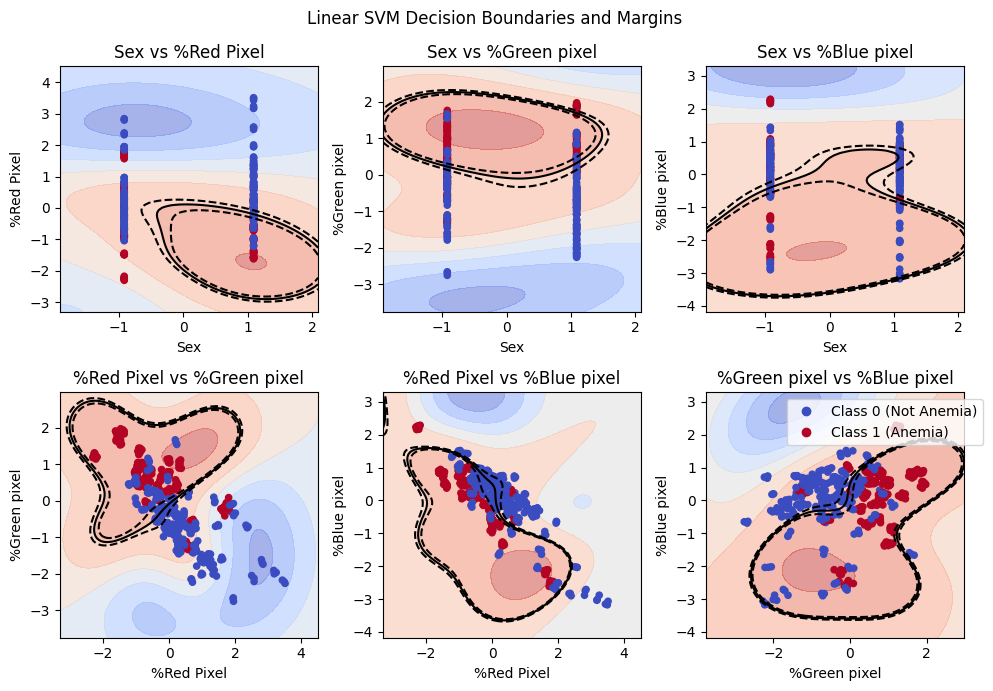

In [ ]:
feature_names = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel']
feature_combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Create a 2x3 grid of subplots
plt.figure(figsize=(10, 7))

for i, features in enumerate(feature_combinations):
    plt.subplot(2, 3, i+1)
    # Extract the two features we're plotting
    X_subset = X_scaled[:, features]

    # Create mesh grid
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create input for prediction
    X_pred = np.zeros((xx.ravel().shape[0], 4))
    X_pred[:, features[0]] = xx.ravel()
    X_pred[:, features[1]] = yy.ravel()

    # Predict
    Z = best_non_linear_svm.decision_function(X_pred)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5)
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

    # Plot data points
    scatter = plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, cmap='coolwarm', s=20)
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.title(f'{feature_names[features[0]]} vs {feature_names[features[1]]}')

# Add a single legend
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ["Class 0 (Not Anemia)", "Class 1 (Anemia)"]
plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.suptitle("Linear SVM Decision Boundaries and Margins")
plt.tight_layout()
plt.show()


### **Neural Network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import itertools

# One-hot encode the target
y_categorical = to_categorical(y)

# Define hyperparameters to tune
activation_functions = ['relu', 'selu', 'tanh']
layer_sizes = [1, 2, 3, 5, 7, 10]
optimizers = ['adam', 'sgd', 'rmsprop']

# Function to create model
def create_model(input_dim, activation, layers, optimizer):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(32, activation=activation))
    for _ in range(layers):
        model.add(Dense(16, activation=activation))
    model.add(Dense(2, activation='softmax'))  # 2 output neurons for binary classification
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Implement k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for activation, layers, optimizer in itertools.product(activation_functions, layer_sizes, optimizers):
    accuracies = []
    precisions = []
    recalls = []
    f1s = []
    roc_aucs = []

    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_categorical[train_index], y_categorical[test_index]

        model = create_model(X_scaled.shape[1], activation, layers, optimizer)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)

        accuracy = accuracy_score(y_test_classes, y_pred_classes)
        precision = precision_score(y_test_classes, y_pred_classes)
        recall = recall_score(y_test_classes, y_pred_classes)
        f1 = f1_score(y_test_classes, y_pred_classes)
        roc_auc = roc_auc_score(y_test_classes, y_pred[:, 1])

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        roc_aucs.append(roc_auc)

    result = {
        'activation': activation,
        'layers': layers,
        'optimizer': optimizer,
        'accuracy': np.mean(accuracies),
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1_score': np.mean(f1s),
        'roc_auc': np.mean(roc_aucs)
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the best model based on accuracy, precision, recall, f1_score, and roc_auc
best_model = results_df.loc[results_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']].mean(axis=1).idxmax()]
print(f"Best model parameters: {best_model.to_dict()}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━

Best model parameters: {'activation': 'relu', 'layers': 7, 'optimizer': 'adam', 'accuracy': 0.946, 'precision': 0.9063715313756362, 'recall': 0.9837837837837838, 'f1_score': 0.9433049348872133, 'roc_auc': 0.9577642440746693}
Best model activation function: relu
Best model number of layers: 7
Best model optimizer: adam


Model: "sequential_546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3672 (Dense)                   │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3673 (Dense)                   │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3674 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3675 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3676 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3677 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3678 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3679 (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3680 (Dense)                   │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,354 (9.20 KB)

 Trainable params: 2,354 (9.20 KB)

 Non-trainable params: 0 (0.00 B)

Layer Type           Layer Number    Nodes      Activation Function
Dense                0               32         relu
Dense                1               16         relu
Dense                2               16         relu
Dense                3               16         relu
Dense                4               16         relu
Dense                5               16         relu
Dense                6               16         relu
Dense                7               16         relu
Dense                8               2          softmax
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


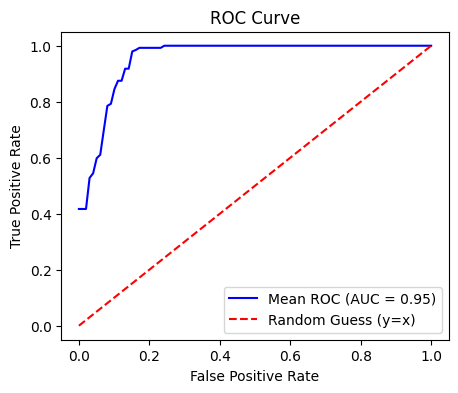

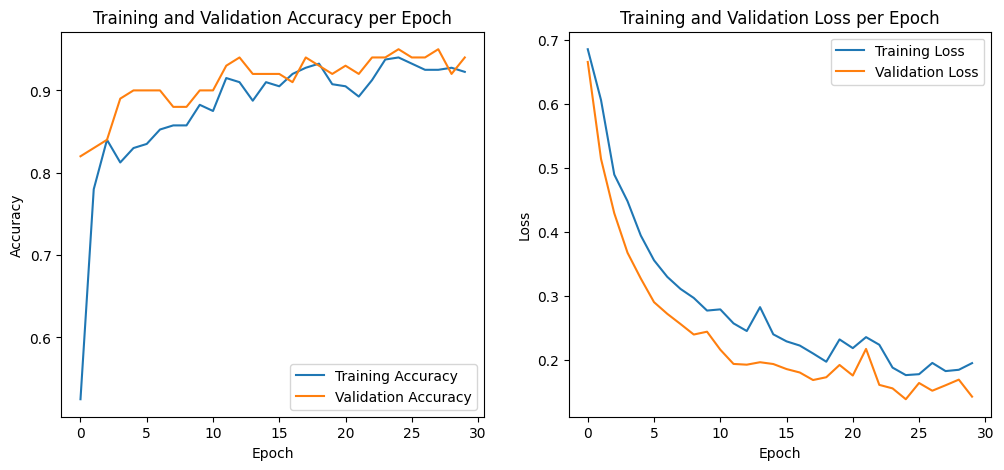

False Positive Rate (FPR): 0.08
False Negative Rate (FNR): 0.02


In [ ]:
print(f"Best model parameters: {best_model.to_dict()}")

# Print the best hyperparameters and model architecture
best_model_activation = best_model['activation']
best_model_layers = best_model['layers']
best_model_optimizer = best_model['optimizer']
input_dim = X_scaled.shape[1]

print(f"Best model activation function: {best_model_activation}")
print(f"Best model number of layers: {best_model_layers}")
print(f"Best model optimizer: {best_model_optimizer}")

best_model_architecture = create_model(input_dim, best_model_activation, best_model_layers, best_model_optimizer)
best_model_architecture.summary()

# Print the model architecture in a formatted way
def print_model_summary(model):
    print(f"{'Layer Type':<20} {'Layer Number':<15} {'Nodes':<10} {'Activation Function'}")
    print("="*60)
    for i, layer in enumerate(model.layers):
        layer_type = layer.__class__.__name__
        config = layer.get_config()
        units = config.get('units', 'N/A')
        activation = config.get('activation', 'N/A')
        print(f"{layer_type:<20} {i:<15} {units:<10} {activation}")

print_model_summary(best_model_architecture)

# Plotting ROC Curve for the best model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    model = create_model(X_scaled.shape[1], best_model_activation, best_model_layers, best_model_optimizer)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    y_pred = model.predict(X_test)
    y_test_classes = np.argmax(y_test, axis=1)
    fpr, tpr, _ = roc_curve(y_test_classes, y_pred[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = roc_auc_score(y_test_classes, y_pred[:, 1])
    aucs.append(roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(aucs)

plt.figure(figsize=(5, 4))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (y=x)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting training/validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Calculate and print false positive rate and false negative rate
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
tn, fp, fn, tp = conf_matrix.ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print(f"False Positive Rate (FPR): {fpr:.2f}")
print(f"False Negative Rate (FNR): {fnr:.2f}")
